results1222.txt contains 6 dataset


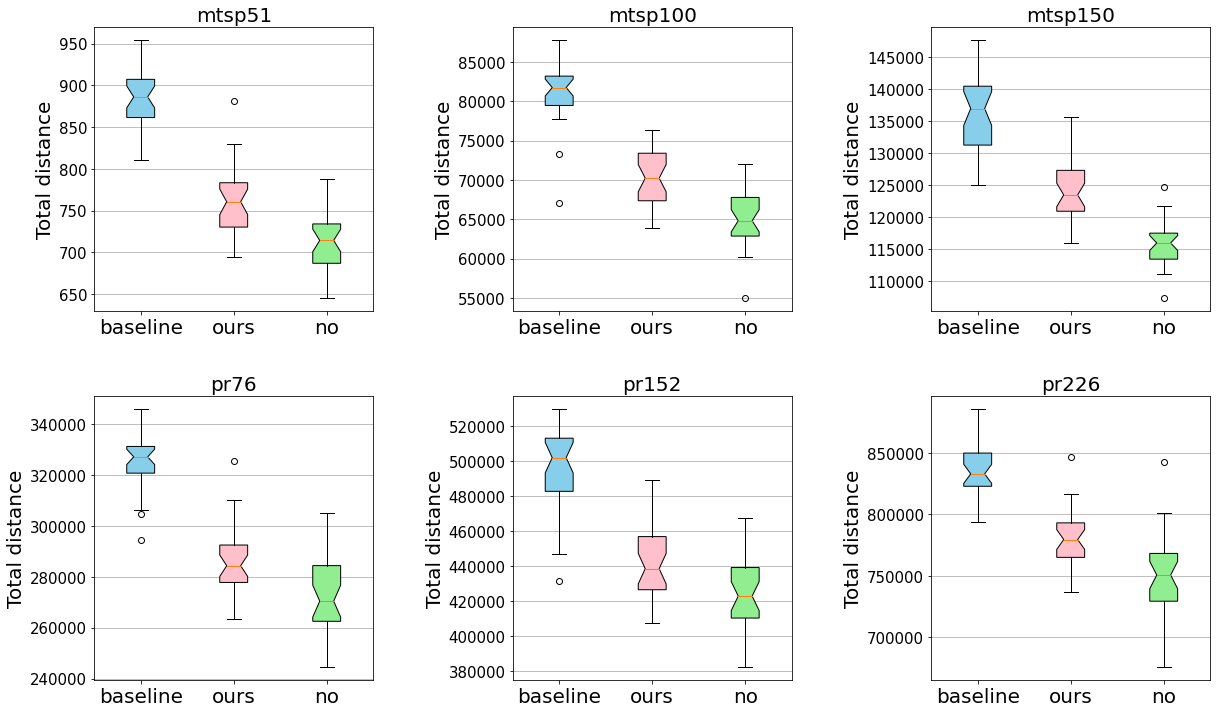

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

results_filepath = 'results1222.txt'
results = pd.read_csv(results_filepath, header=None)


data = {}

for i in results.index:
    row = results.loc[i]
    instance = row[0]
    algorithm_name = row[1]
    data_type = row[2]

    if not instance in data:
        data[instance] = {}
    if not algorithm_name in data[instance]:
        data[instance][algorithm_name] = {} 
    data[instance][algorithm_name][data_type] = row[3:].to_numpy().tolist()

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
plt.subplots_adjust(wspace=0.5, hspace=0.3)  # adjust the interval of subplots

print(f"{results_filepath} contains {len(data.keys())} dataset")

dataset = ['mtsp51', 'mtsp100', 'mtsp150', 'pr76', 'pr152', 'pr226']
labels = ['baseline', 'ours','no']
colors = ['skyblue', 'pink', 'lightgreen']

for i in range(6):
    x = i // 3
    y = i % 3
    bplot = ax[x][y].boxplot([distance[i], distance[i + 6], distance[i+12]],
                         vert=True,  # vertical box alignment
                         notch=True,  # notch shape
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
    ax[x][y].set_ylabel('Total distance', fontsize=20)
    ax[x][y].tick_params(axis='y', which='major', labelsize=15)
    ax[x][y].tick_params(axis='x', which='major', labelsize=20)
    ax[x][y].set_title(dataset[i], fontsize=20)
    ax[x][y].yaxis.grid(True)

    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)


plt.savefig('./compare.jpg')
plt.show()

